-----

# Inspect data

---

Import packages:

__Note__ This cell needs to run without an error before you continue!

In [1]:
import os

import SimpleITK as sitk

import ImageViewer as iv
import preprocessing as p

# this is needed for 'interactive' plots in jupyter notebook
%matplotlib notebook

First, we kann look at some images:
    - use right and left arrows to move through the slices 
    - use up and down to change the shown image

<IPython.core.display.Javascript object>


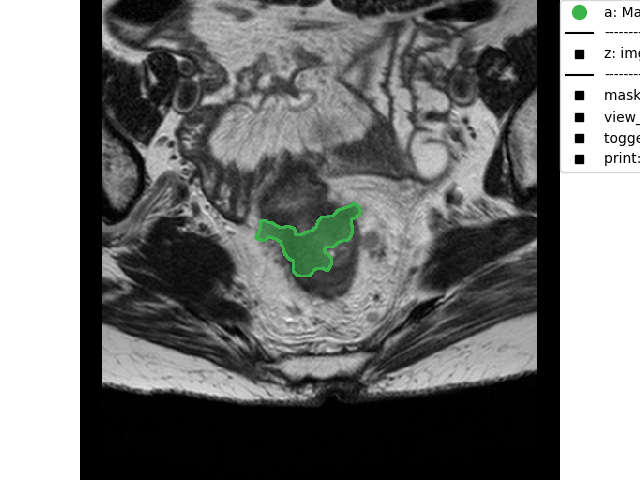

In [2]:
# the T2 image
plot_t2 = iv.show_folder(r'test_images')

# Preprocessing

The aim is to resample and croop the image to a box around the union of both manual contours with a specific margin

In [3]:
def preprocessing_radiomics(path_to_patient_image_folder, destination_folder, 
                           margin_in_mm=[10,10,10], voxelsize=None):
    """
    This function takes the data from patient_image_folder, 
    It Croops images and masks in this folder to a box around the union of the masks. 
    You can use margin_in_mm to adjust the margin [mx, my, mz] (default is 10 mm in each direction.)
    If voxelsize is None, the original voxelsize is used
    If voxelsize [sx, sy, sz] (for example [1,1,1]) images and masks are resampled to this new voxelsize
    
    The results are saved to the destionation folder, where the file names are unchanged.
    
    """
    ### Create destinaion_folder if it does not already exist
    if not os.path.isdir(destination_folder):
        os.makedirs(destination_folder)
    
    
    ### Read the data
    
    data = {'images':{}, 'mask':{}}

    # Assumption: nii files, Images start with img and Masks with Mask
    for file in os.listdir(path_to_patient_image_folder):
        if file.startswith('img') and file.endswith('.nii'):
            data['images'][file] = sitk.ReadImage(os.path.join(path_to_patient_image_folder, file))
            
        if file.startswith('Mask') and file.endswith('.nii'):
            data['mask'][file] = 0<sitk.ReadImage(os.path.join(path_to_patient_image_folder, file))
            mask_file_name = file
    
    ### get the union and intersection of all avaliable masks
#     union = sitk.Or(*list(data['masks'].values()))

    
    ### Prepare the resampling and croping
    resampler = p.Resample_And_Crop()
    resampler.set_roi_as_box_around_mask(data['mask'][mask_file_name], margin_in_mm=margin_in_mm)
    if voxelsize:
        resampler.set_spacing(voxelsize)
        
    
    ### Do the resampling and crooping and save the results in the destination_folder
    for filename, image in data['images'].items():
        sitk.WriteImage(resampler.process_image(image), 
                        os.path.join(destination_folder, filename))
    for filename, mask in data['mask'].items():
        sitk.WriteImage(resampler.process_mask(mask), 
                       os.path.join(destination_folder, filename))

<IPython.core.display.Javascript object>


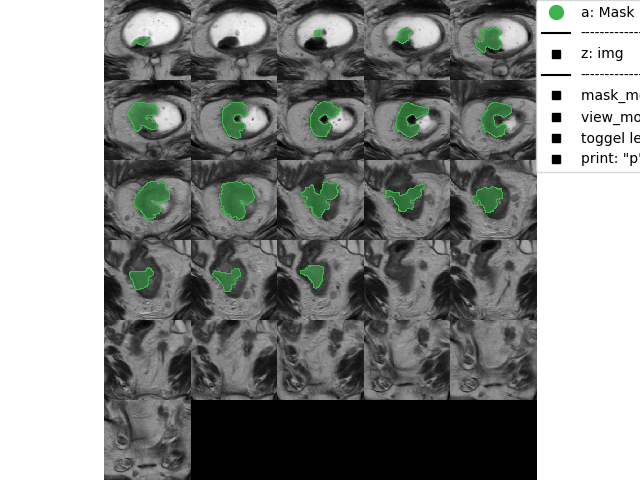

In [4]:
# This is an example of how to use the function in the cell above. 

# to try it your self adjust test_folder and destination_folder
# and play around with the parameters margin_in_mm and voxelsize
# and try different input folders :)

test_folder = r'test_images'
destination_folder = r'test_radiomics_2'
preprocessing_radiomics(test_folder, destination_folder, 
                        margin_in_mm=[20,20,20], 
                       ) 


plot_3 = iv.show_folder(destination_folder)

---
## Common folder operations


In [13]:
import os # this is a helpful package for most folder operations
import shutil # this is a usefull package for higer level operations (for example copy files with shutil.copyfile)


In [14]:
# A very usefull thing to know, is that you can always use help(some_python_thing)
help(shutil.copyfile)

Help on function copyfile in module shutil:

copyfile(src, dst, *, follow_symlinks=True)
    Copy data from src to dst.
    
    If follow_symlinks is not set and src is a symbolic link, a new
    symlink will be created instead of copying the file it points to.



In [22]:
# to combine folders, subfolders and filename and so on
os.path.join('folderA', 'subfolderB', 'subsubfolderC', 'filename.ending')

'folderA\\subfolderB\\subsubfolderC\\filename.ending'

In [20]:
# get subfolders in a main_data_folder:
main_data_folder = '.' # I use the 'current' directury as an example

subfolder_list = [f for f in os.listdir(main_data_folder) 
                      if os.path.isdir(os.path.join(main_data_folder, f))]

print(subfolder_list)

['.git', '.ipynb_checkpoints', 'AnalyseResults', 'Dataset', 'Matlab', 'Notebooks', 'PostProcessing', 'test_radiomics', 'Test_Scripts', 'Training', '__pycache__']
